2) Questão: Como se deu o numero de nascidos somando ano a ano e mês a mês dentro do período de 5 anos  

Hipótese - Devido ao aumento de pedidos de animais no biotério, houve um crescimento na produção de animais


Importando as bibliotecas para analise desses dados. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams.update({'font.size': 20})
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

In [2]:
#Abrindo uma variável que vai receber e ler com a função .read_csv nossa tabela que será analisada

eel = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
eel.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
1,1408122540,Giovanny,Swiss A,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
2,1408122540,Giovanny,Swiss A,2,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
3,1408122540,Giovanny,Swiss B,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
4,1408122540,Giovanny,Swiss B,3,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
5,1408122540,Giovanny,Swiss B,4,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA


In [3]:
#Filtrando coluna com as condições

num_nasc = eel[(eel['util'] == 'nasc') & (eel['num_nasc'] < 200)]

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=

#lista com nome das colunas referentes a datas
datas = ['date_hoje', 
         'date_nasc', 
         'data_inicio', 
         'date_acas', 
         'date_nasc_acas', 
         'date_sex', 
         'data_solic', 
         'data_forn', 
         'data_fim']

#laço que em c percorre em datas e padronizando tudo em formato de data pela função to_datetime
for c in datas:
    num_nasc[c] = pd.to_datetime(num_nasc[c], unit = 's') #indica o formato das datas
    
num_nasc.head()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


A Dataframe é uma forma de organizar os dados como uma tabela, contendo as informações das colunas e cada instância (dado).
Na próxima célula foi criada uma Dataframe (temp_num_sex) que foi criada para organizar o que for analizado. Para criar essa DataFrame, foi feita a partir de outra (num_nasc) mantendo as mesmas informações de cada coluna. Tenho como index a coluna 'date_hoje'. As colunas podem estar dispostas em qualquer ordem. Você pode acrescentar apenas o que vai usar.

In [4]:
#Criada DataFrame para plotagem do gráfico

temp_num_sex = pd.DataFrame(num_nasc['date_hoje'])
temp_num_sex['num_nasc'] = num_nasc['num_nasc']
temp_num_sex = temp_num_sex.set_index('date_hoje')
temp_num_sex.head()

,num_nasc
date_hoje,
2014-09-23 17:40:33,5
2014-09-23 17:40:33,10
2014-09-23 17:40:33,20
2014-09-23 17:40:47,10
2014-09-23 17:40:47,20


In [5]:
inic = num_nasc.loc[num_nasc.index.min(), "date_hoje"] #loc: localizador - localizando a primeira data
fim = num_nasc.loc[num_nasc.index.max(), "date_hoje"]

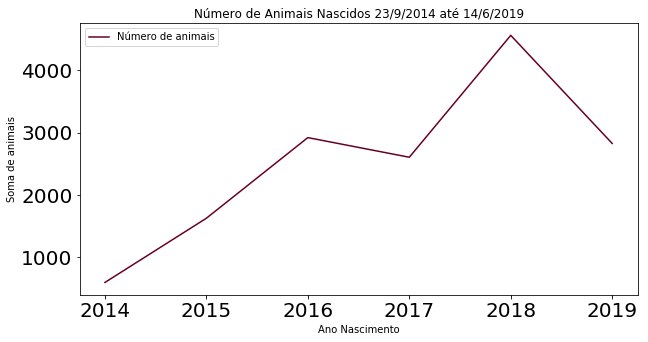

In [6]:
#Soma de animais nascidos ano a ano
tsAno = temp_num_sex.resample('A').sum() #resample('A') agrupamento por ano, sum() somando os dados
#tsAno = num_sex.query("ling == 'Balb/c'").plot(
#tsAno.query("ling == 'Balb/c'").plot(
tsAno.plot(
    figsize=(10, 5),
        colormap='RdBu',
        title=f'Número de Animais Nascidos {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
plt.legend(['Número de animais'])
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/2_pergunta_nasc_anoaano.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

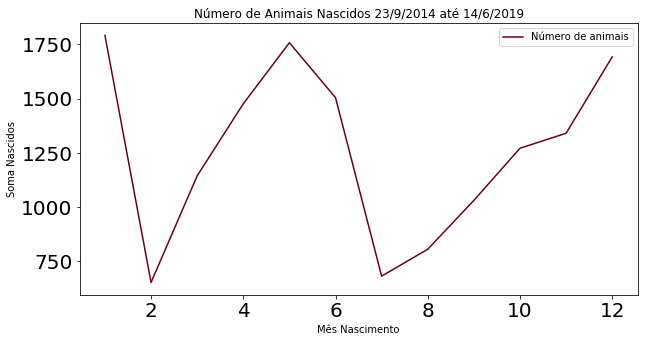

In [7]:
#Soma de animais nascidos mês a mês
tsMes = temp_num_sex.groupby([lambda x: x.month]).sum() # agrupamento por mes
tsMes.plot(
        figsize=(10, 5),
        colormap='RdBu',
        title=f'Número de Animais Nascidos {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
plt.legend(['Número de animais']) #legenda
plt.xlabel('Mês Nascimento') #identificação eixo x
plt.ylabel('Soma Nascidos') #identificação eixo y
plt.savefig(
    fname="../resultados/2_pergunta_nasc_mesames.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)


Resultado:

Os dados sugerem que houve um crescimento desde o ano 2014 (implementação do BioterC) até 2019.
Em 2016 houve um aumento em relação aos anos anteriores, diminuindo em 2017 (ano que houve dificuldade
no comitê de ética para experimentos com animais) diminuindo o número de pedidos.
Aumentando sua produção em 2018, ano que houve grandes pedidos de criação animal.

O segundo gráfico é a soma de mês a mês, observando um aumento da criação nos meses de Dezembro e 
Janeiro (grande pedido da IBMP) seguindo com mês de Junho (período pós jornada acadêmica do ICC).


Desdobramento: Após determinar o período (anual/mensal) de todas as linhagens, a próxima pergunta é como a produção de camundongos se comporta dentro desses períodos por grupos isogênicos e heterogênicos. 